In [11]:
%pip install scikit-learn==1.6.1 matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exploratory data analysis

As usual, we start by taking at look at the dataset.

* IDS_mapping.csv file isn't structured as a normal CSV because it contains multiple tables within one file

In [13]:
# Load the data
ids_mapping = pd.read_csv("./data/IDS_mapping.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
ids_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


🔍 Solution: Read and Split the File Correctly
Since Pandas can’t read it directly, we need to:

1. Read the file as raw text.
2. Split it into separate dataframes based on blank lines.
3. Process and clean each dataframe.

In [14]:
# Read the raw file
with open("./data/IDS_mapping.csv", "r") as f:
    lines = f.read().split("\n")  # Split by line

📌 Identify the Different Tables in "IDS_mapping.csv"

Each section has:

* A header (column names) followed by data.
* A comma line separating different tables.

We need to extract:

1. admission_type_id mapping
2. discharge_disposition_id mapping
3. admission_source_id mapping

In [15]:
# Find table starting points
tables = []
current_table = []

for line in lines:
    if line != ',':  # If line is NOT a comma
        current_table.append(line)
    else:  # If empty line, save previous table and start new
        if current_table:
            tables.append(current_table)
            current_table = []

# Add last table if exists
if current_table:
    tables.append(current_table)

# Check how many tables were found
print(f"Found {len(tables)} tables")
admission_type_id = tables[0]
discharge_disposition_id = tables[1]
admission_source_id = tables[2]

print(admission_type_id)
print(discharge_disposition_id) 
print(admission_source_id)


Found 3 tables
['admission_type_id,description', '1,Emergency', '2,Urgent', '3,Elective', '4,Newborn', '5,Not Available', '6,NULL', '7,Trauma Center', '8,Not Mapped']
['discharge_disposition_id,description', '1,Discharged to home', '2,Discharged/transferred to another short term hospital', '3,Discharged/transferred to SNF', '4,Discharged/transferred to ICF', '5,Discharged/transferred to another type of inpatient care institution', '6,Discharged/transferred to home with home health service', '7,Left AMA', '8,Discharged/transferred to home under care of Home IV provider', '9,Admitted as an inpatient to this hospital', '10,Neonate discharged to another hospital for neonatal aftercare', '11,Expired', '12,Still patient or expected to return for outpatient services', '13,Hospice / home', '14,Hospice / medical facility', '15,Discharged/transferred within this institution to Medicare approved swing bed', '16,Discharged/transferred/referred another institution for outpatient services', '17,Disc

#### admission_type_id table extraction

In [16]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_type_id]

# Define the output CSV file name
output_file_admission_type_id = './output_data/admission_type_id.csv'

# Write to CSV
with open(output_file_admission_type_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_type_id}' created successfully.")

CSV file './output_data/admission_type_id.csv' created successfully.


In [17]:
# Load the data admission_type_id
admission_type_id = pd.read_csv("./output_data/admission_type_id.csv")
pd.set_option('display.max_rows', None)  # Display all rows
admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [18]:
# Load dataset
diabetic_data = pd.read_csv("./data/diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Display all cols

# Display first few rows
display(diabetic_data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### discharge_disposition_id table extraction

In [19]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in discharge_disposition_id]

# Define the output CSV file name
output_file_discharge_disposition_id = './output_data/discharge_disposition_id.csv'

# Write to CSV
with open(output_file_discharge_disposition_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_discharge_disposition_id}' created successfully.")

CSV file './output_data/discharge_disposition_id.csv' created successfully.


In [21]:
# Load the data discharge_disposition_id
discharge_disposition_id = pd.read_csv("./output_data/discharge_disposition_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


#### admission_source_id table extraction

In [22]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_source_id]

# Define the output CSV file name
output_file_admission_source_id = './output_data/admission_source_id.csv'

# Write to CSV
with open(output_file_admission_source_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_source_id}' created successfully.")

CSV file './output_data/admission_source_id.csv' created successfully.


In [23]:
# Load the data admission_source_id
admission_source_id = pd.read_csv("./output_data/admission_source_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
admission_source_id

,admission_source_id,description
0,1.0,Physician Referral
1,2.0,Clinic Referral
2,3.0,HMO Referral
3,4.0,Transfer from a hospital
4,5.0,Transfer from a Skilled Nursing Facility (SNF)
5,6.0,Transfer from another health care facility
6,7.0,Emergency Room
7,8.0,Court/Law Enforcement
8,9.0,Not Available
9,10.0,Transfer from critial access hospital


### Task 1: Dataset description (15%)
1.1 Describe the characteristics of the dataset (e.g. data types, sample-to-features ratio) and
use descriptive statistics and figures/plots to show the dataset characteristics.

1.2 Describe the challenges with the dataset (e.g. missing data, unbalanced classes). (5%)

---

1.1 and 1.2 Identify Data Characteristics, and describe the challenges within the dataset:
* a. Data Types: Determine whether the features in your dataset are numerical (e.g., integers, floats) or categorical (e.g., strings, boolean values).
* b. Sample-to-Feature Ratio: This refers to the number of samples (rows) in the dataset relative to the number of features (columns). A common ratio is to have more samples than features, but some datasets might have more features than samples.
* c. Missing Values: Check if there are missing values in any of the features and how they are handled.
* d. Outliers: Look for any outliers or unusual values in the dataset that might affect analysis.

In [24]:
# Replace missing values with NaN

# Define a list of common placeholders
placeholders = ['?', 'NA', 'none', 'N/A', 'null']

diabetic_data_placeholders_substituted = diabetic_data.copy(deep=True)

# Replace all placeholder values with NaN across the entire DataFrame
diabetic_data_placeholders_substituted.replace(placeholders, None, inplace=True)

In [48]:
analyze_dataframe(diabetic_data_placeholders_substituted)

DataFrame - Data Types of Features:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide     

C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will


Corrected Data Types:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              obje

C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will

In [25]:
print("Missing Values in Each Feature:")
missing_values = diabetic_data_placeholders_substituted.isnull().sum()
print(missing_values)
# Check for missing values

Missing Values in Each Feature:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride     

In [26]:
diabetic_data_placeholders_substituted.to_csv('./output_data/replaced_placeholders_with_nan.csv', sep=',', index=False, encoding='utf-8')

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


def analyze_dataframe(df, df_name="DataFrame"):
    # Prepare the output text
    output_text = []

    # a. Identify Data Types for every CSV file
    print(f"{df_name} - Data Types of Features:")
    print(df.dtypes)
    print(f"{df_name} - Shape: " , df.shape)

    # b. Sample-to-Feature Ratio
    num_samples = df.shape[0]  # Number of rows (samples)
    num_features = df.shape[1]  # Number of columns (features)
    print(f"\n{df_name} - Sample-to-Feature Ratio:")
    print(f"Number of Samples: {num_samples}")
    print(f"Number of Features: {num_features}")
    print(f"Sample-to-Feature Ratio: {num_samples / num_features:.2f}")

    # c. Missing Values
    print(f"\n{df_name} - Missing Values in Each Feature:")
    missing_values = df.isnull().sum()
    print(missing_values)

    # c.1. Missing Values Percentage
    print(f"\n{df_name} - Missing Values Percentage:")
    missing_values_percentage = (missing_values / len(df)) * 100
    print(missing_values_percentage)

    # d. Summary Statistics
    print(f"\n{df_name} - Summary Statistics:")
    summary_statistics = df.describe(include='all')

    # d.1 Print Statistics in a more readable format
    print(f"\n{df_name} - Summary Statistics:")
    print(summary_statistics)

    # e. Check for coerence in data types
    print(f"\n{df_name} - Check for coherence in data types:")


    # Convert columns that look like dates (strings in date format) to datetime
    for col in df.select_dtypes(include='object').columns:
        try:
            # Try converting to datetime
            df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
            print(f"Converted {col} to 'datetime'")
        except (ValueError, TypeError):
            pass

    # Check the final data types
    print("\nCorrected Data Types:")
    print(df.dtypes)



In [ ]:
# Analyze the diabetic_data.csv DataFrame
# analyze_dataframe(diabetic_data, "diabetic_data.csv DataFrame") - without replacing placeholders

In [ ]:
# Analyze the admission_source_id.csv DataFrame
analyze_dataframe(admission_source_id, "admission_source_id.csv DataFrame")

admission_source_id.csv DataFrame - Data Types of Features:
admission_source_id    float64
description             object
dtype: object
admission_source_id.csv DataFrame - Shape:  (26, 2)

admission_source_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 26
Number of Features: 2
Sample-to-Feature Ratio: 13.00

admission_source_id.csv DataFrame - Missing Values in Each Feature:
admission_source_id    1
description            2
dtype: int64


In [ ]:
# Analyze the admission_type_id.csv DataFrame
analyze_dataframe(admission_type_id, "admission_type_id.csv DataFrame")

admission_type_id.csv DataFrame - Data Types of Features:
admission_type_id     int64
description          object
dtype: object
admission_type_id.csv DataFrame - Shape:  (8, 2)

admission_type_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 8
Number of Features: 2
Sample-to-Feature Ratio: 4.00

admission_type_id.csv DataFrame - Missing Values in Each Feature:
admission_type_id    0
description          1
dtype: int64


In [ ]:
# Analyze the discharge_disposition_id.csv DataFrame
analyze_dataframe(discharge_disposition_id, "discharge_disposition_id.csv DataFrame")

discharge_disposition_id.csv DataFrame - Data Types of Features:
discharge_disposition_id     int64
description                 object
dtype: object
discharge_disposition_id.csv DataFrame - Shape:  (30, 2)

discharge_disposition_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 30
Number of Features: 2
Sample-to-Feature Ratio: 15.00

discharge_disposition_id.csv DataFrame - Missing Values in Each Feature:
discharge_disposition_id    0
description                 1
dtype: int64


In [110]:
# join the three dataframes into diabetic_data dataframe

diabetic_data = diabetic_data.merge(admission_type_id, how="left", left_on="admission_type_id", right_on="admission_type_id")
diabetic_data = diabetic_data.merge(discharge_disposition_id, how="left", left_on="discharge_disposition_id", right_on="discharge_disposition_id")
diabetic_data = diabetic_data.merge(admission_source_id, how="left", left_on="admission_source_id", right_on="admission_source_id")

# Check the columns after each merge to ensure they are correct
print(diabetic_data.columns)

# Rename the columns correctly
diabetic_data.rename(columns={"description_x": "admission_type_id_description", 
                     "description_y": "discharge_disposition_id_description", 
                     "description": "admission_source_id_description"}, inplace=True)

# Verify the columns after renaming
print(diabetic_data.columns)

print(diabetic_data.head())

print(diabetic_data[['admission_type_id', 'admission_type_id_description']].head())
print(diabetic_data[['discharge_disposition_id', 'discharge_disposition_id_description']].head())
print(diabetic_data[['admission_source_id', 'admission_source_id_description']].head())

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'admission_type_id_description', 'discharge_disposition_id_description', 'admission_source_id_description', 'description_x', 'description_y', 'description'], dtype='object')
In

#### Visualise distributions

We can now plot some graphs showing the data distribution for all features in the dataset.
There are quite a few features in the dataset: we split them in different groups when plotting their distributions.

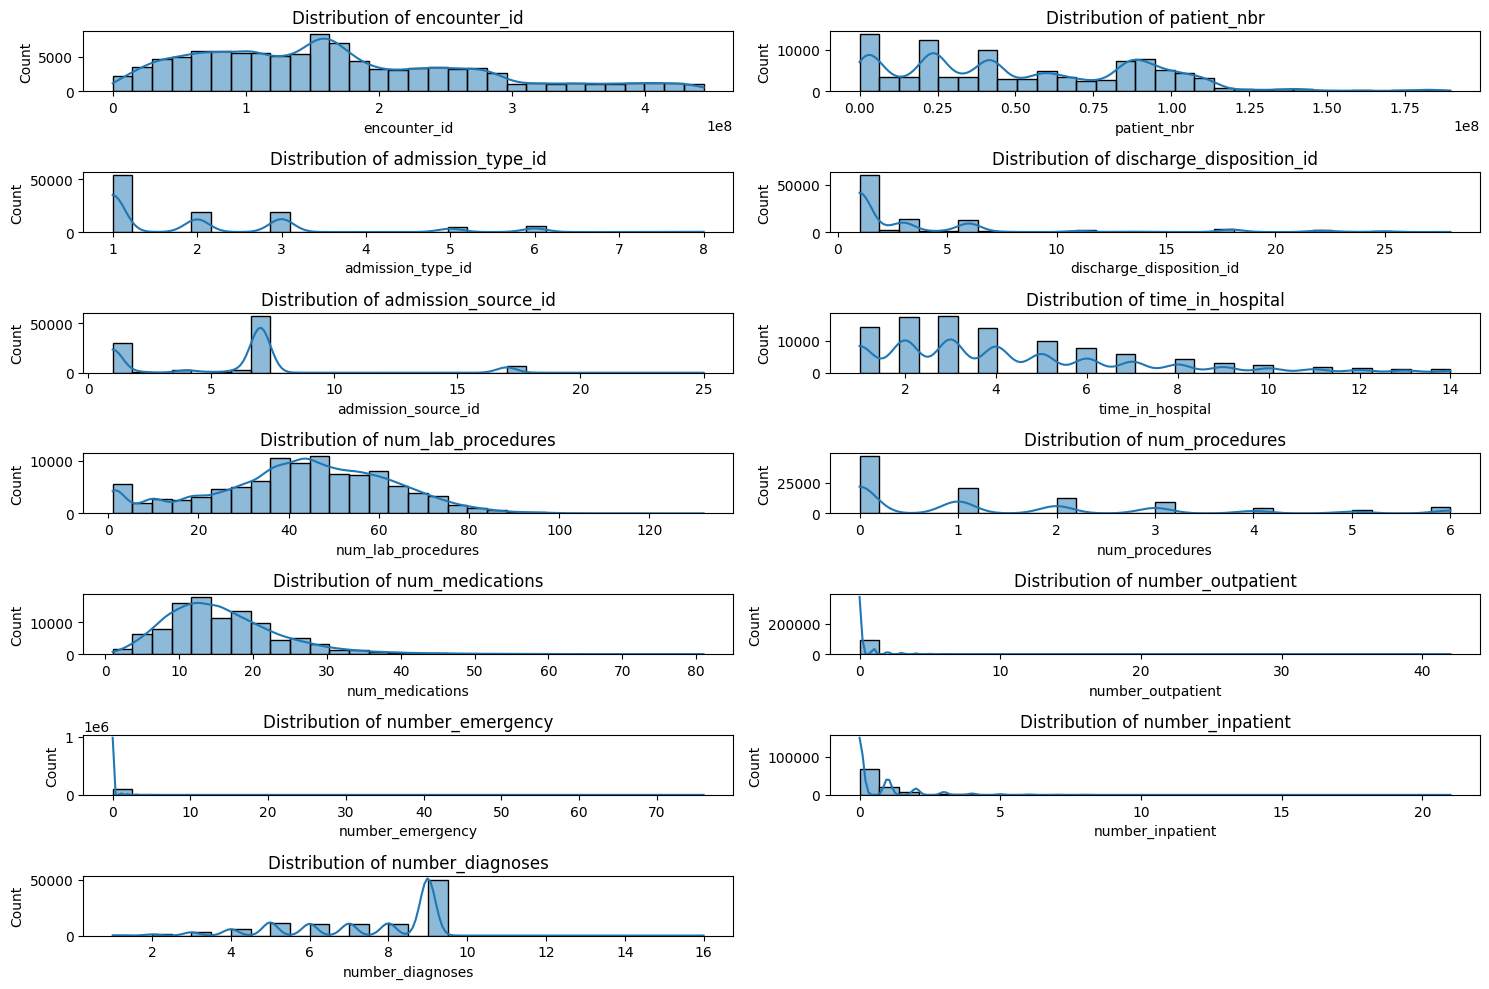

In [29]:
# Selecting numerical columns
numerical_cols = diabetic_data_placeholders_substituted.select_dtypes(include=['int64', 'float64']).columns
num_cols = 2
num_rows = (len(numerical_cols) // num_cols) + (1 if len(numerical_cols) % num_cols > 0 else 0)

# Plot distributions for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(diabetic_data_placeholders_substituted[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import shutil


output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)


diabetic_data_placeholders_substituted_nolabel = diabetic_data_placeholders_substituted.drop(columns='readmitted', inplace=False)
non_numerical_cols = diabetic_data_placeholders_substituted_nolabel.drop(columns=numerical_cols).columns

# Create a list to store plot filenames
plot_filenames = []

# Plot distributions for non-numerical columns and save them as images
for col in non_numerical_cols:
    distinct_count = diabetic_data_placeholders_substituted_nolabel[col].nunique()
    
    plt.figure(figsize=(10, 5))
    
    if col == 'diag_3':
        plt.xticks([], [])
        
    if distinct_count > 10:
        plt.xticks([], [])
        
    plt.xticks(rotation=45, ha="right")
    sns.histplot(diabetic_data_placeholders_substituted_nolabel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    

    plot_filename = f"{output_dir}/{col}_distribution.png"
    plt.tight_layout()
    plt.savefig(plot_filename)
    plt.close()
    

    plot_filenames.append(plot_filename)


zip_filename = "./output_data/plots.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for plot_file in plot_filenames:
        zipf.write(plot_file, os.path.basename(plot_file))


shutil.rmtree(output_dir)

print(f"All plots have been saved and zipped into {zip_filename}")


All plots have been saved and zipped into ./output_data/plots.zip


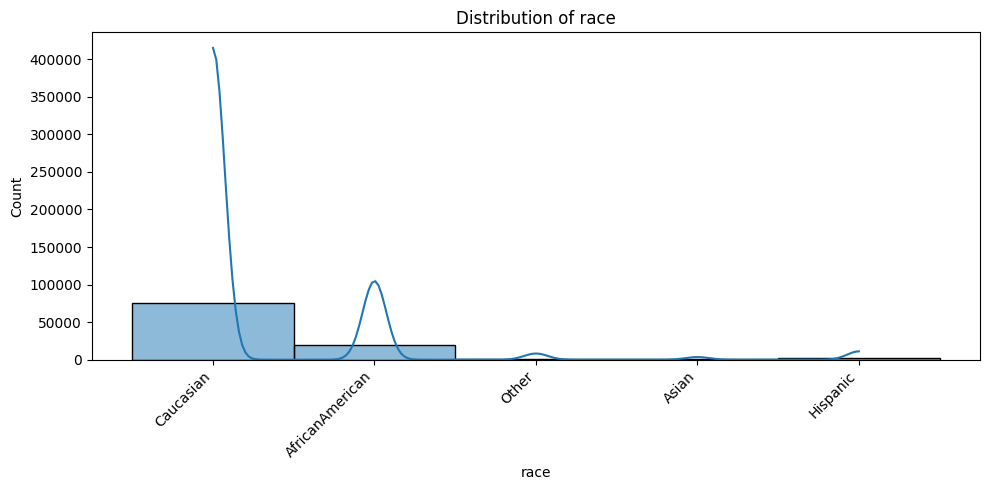

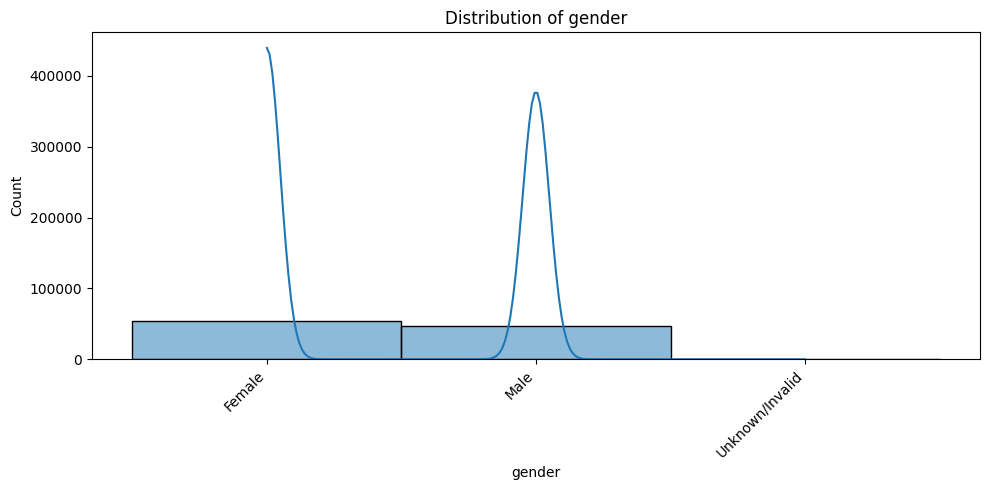

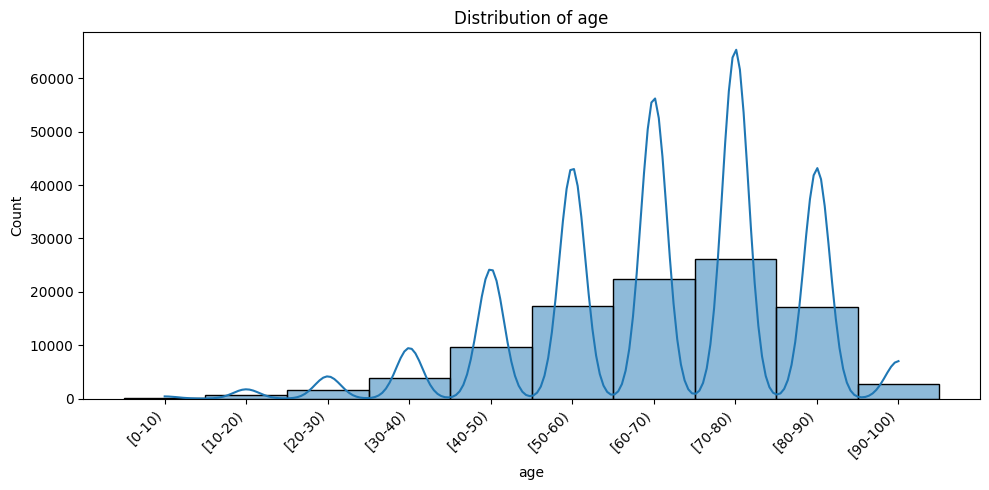

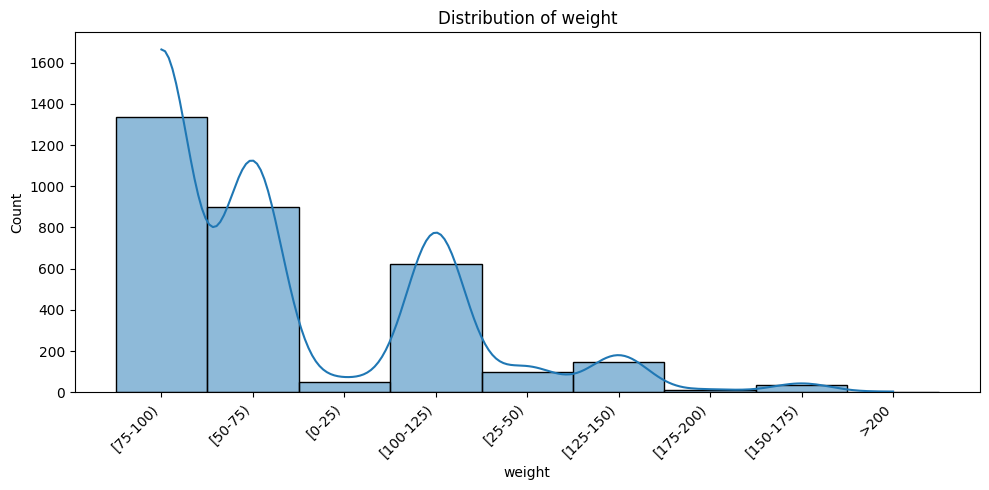

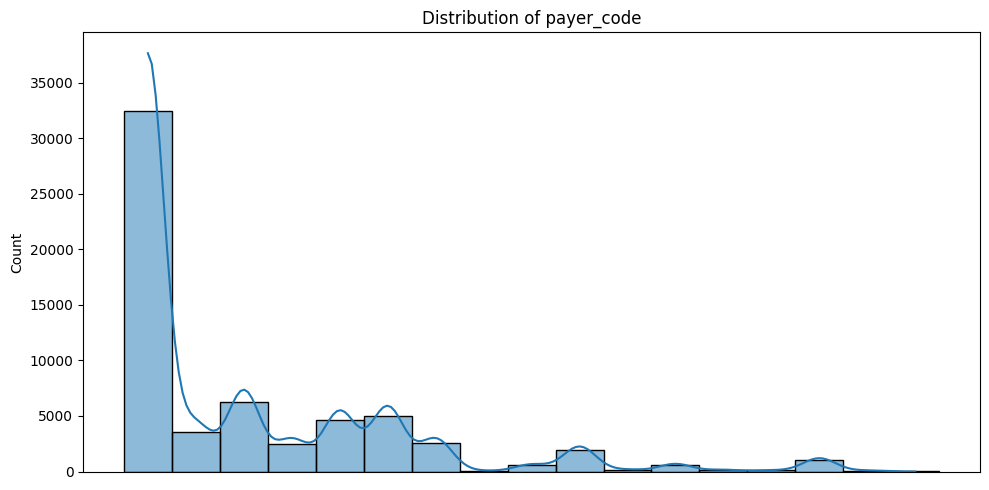

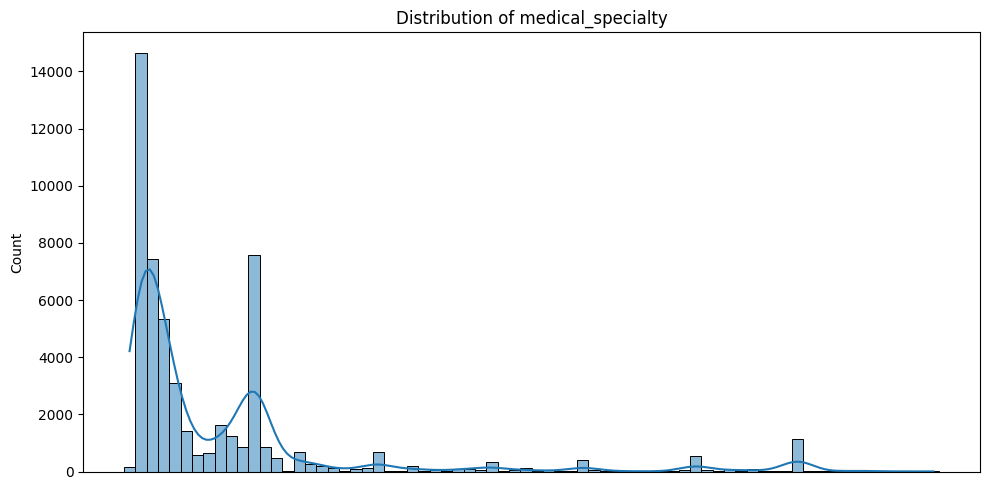

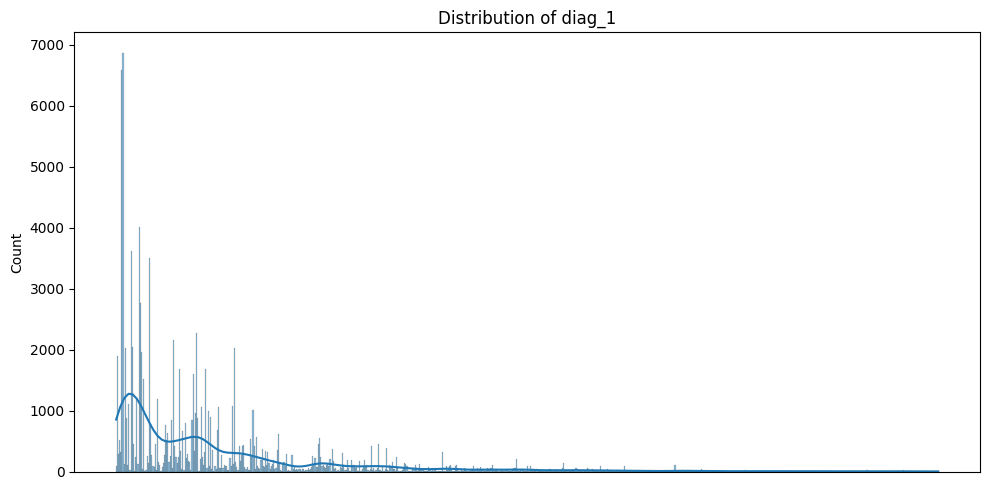

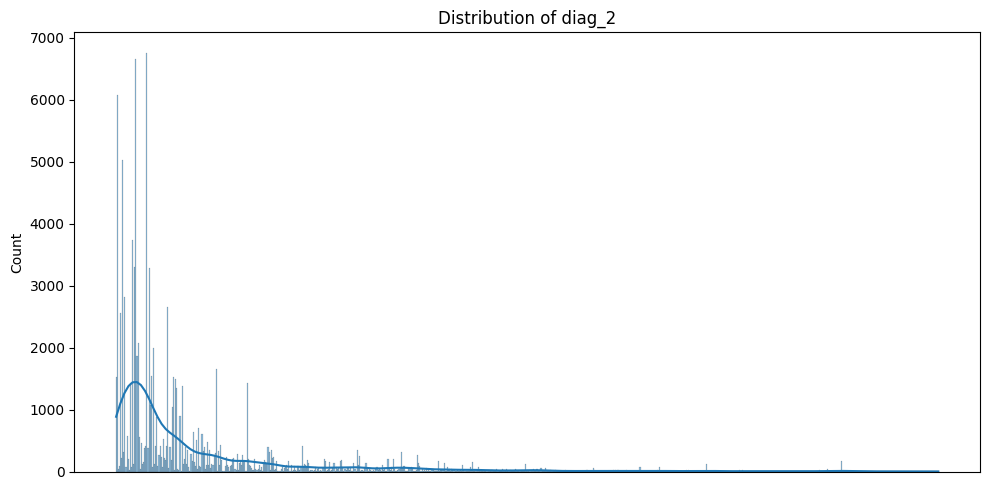

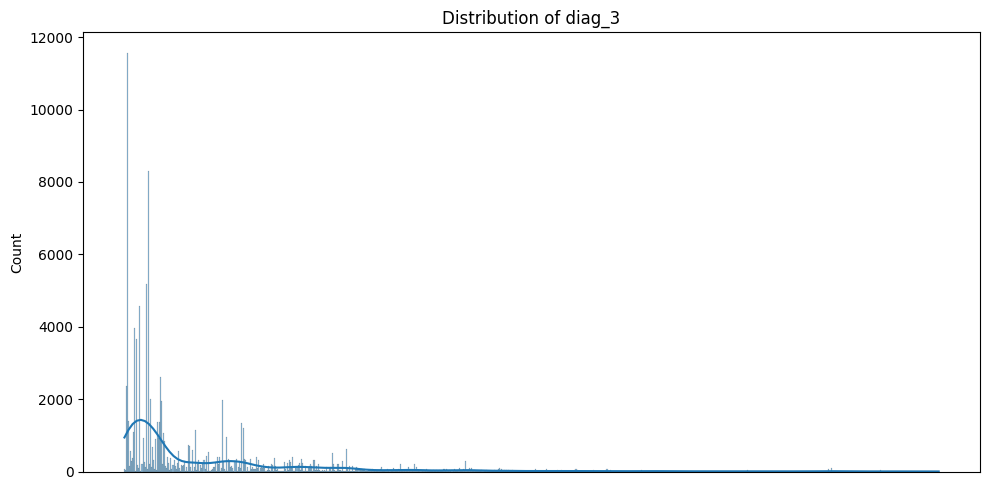

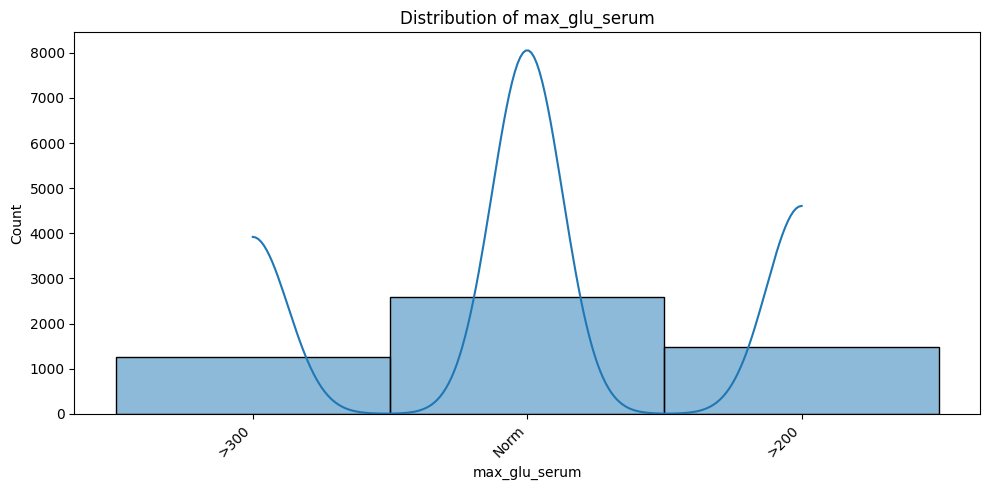

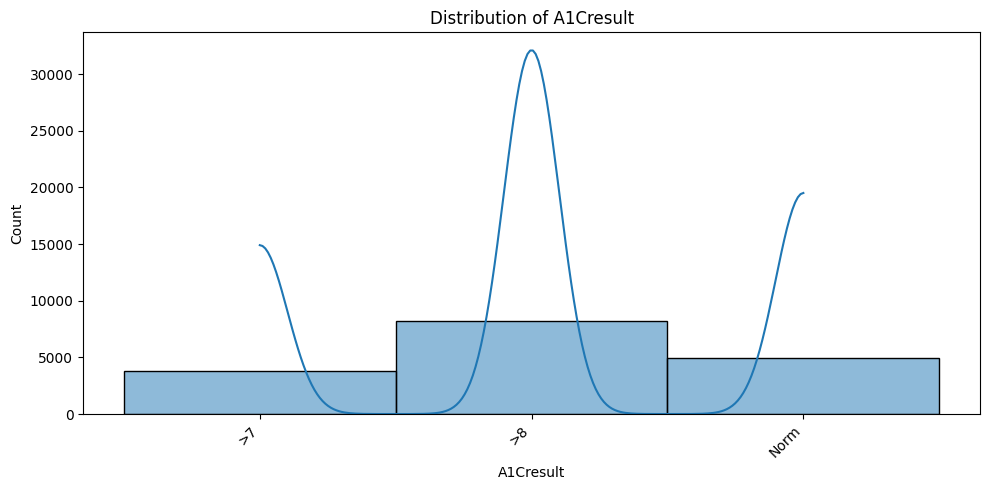

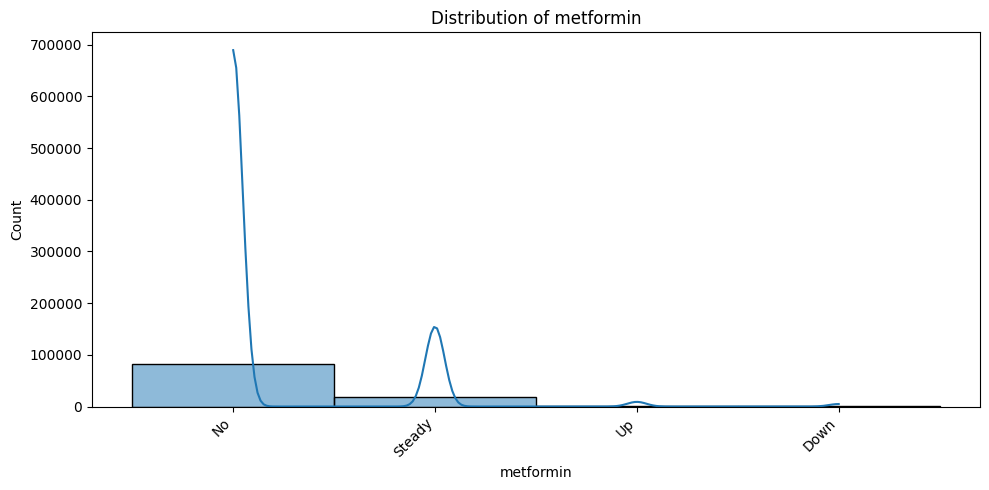

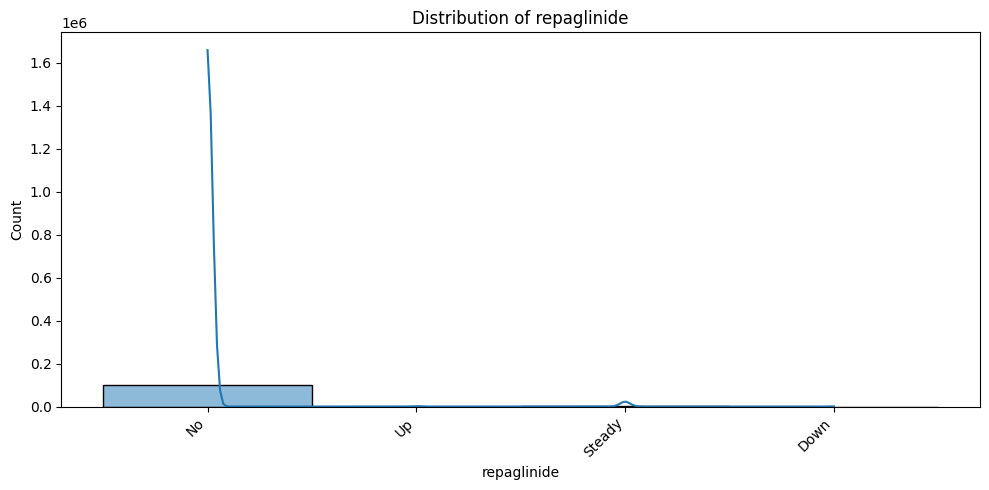

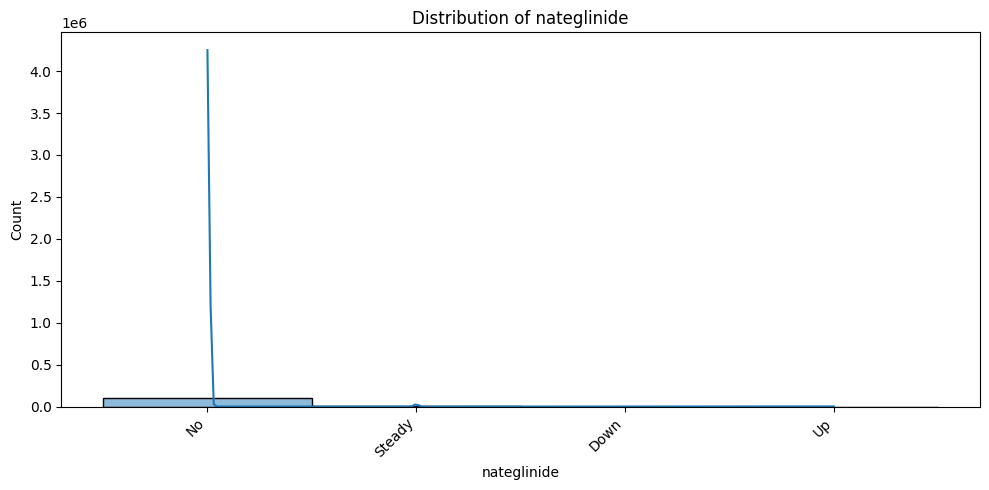

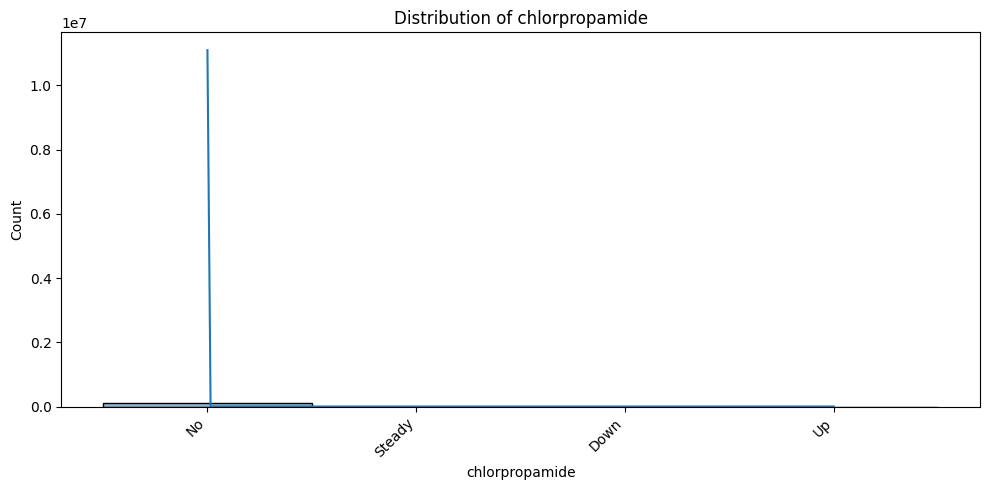

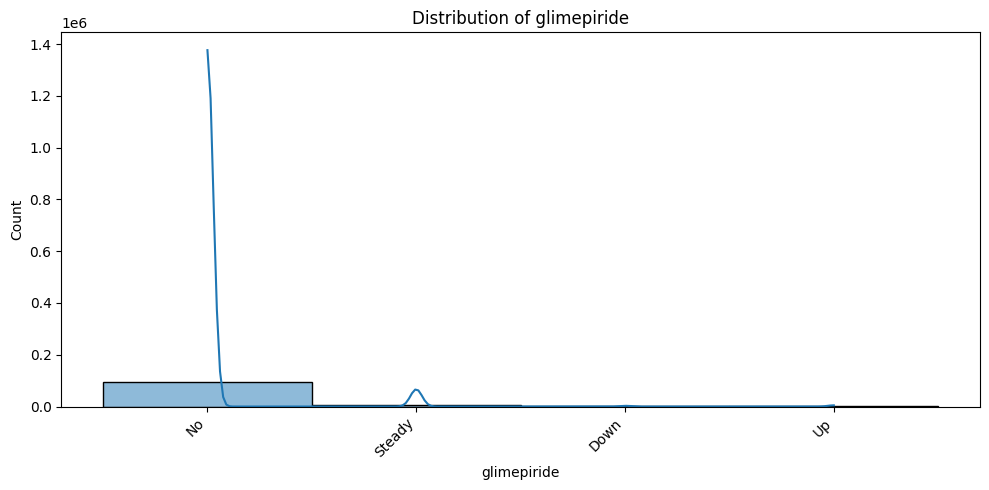

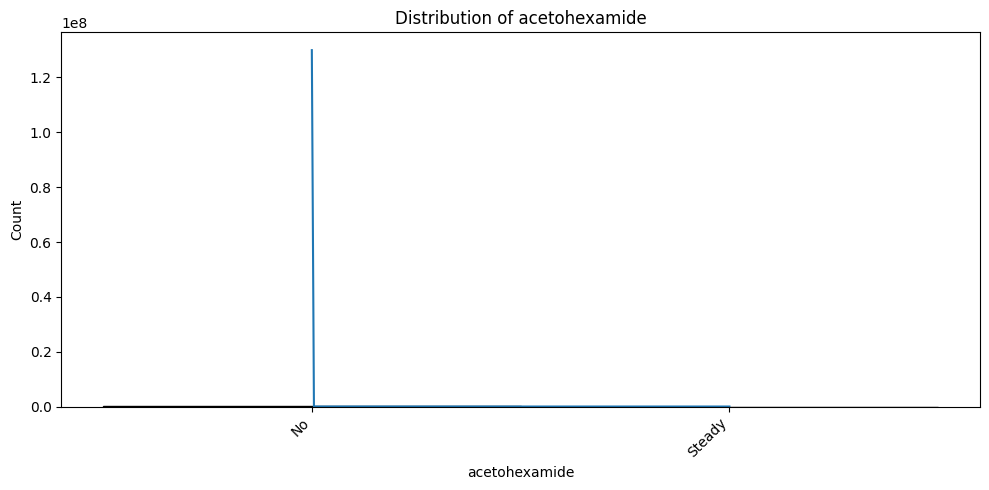

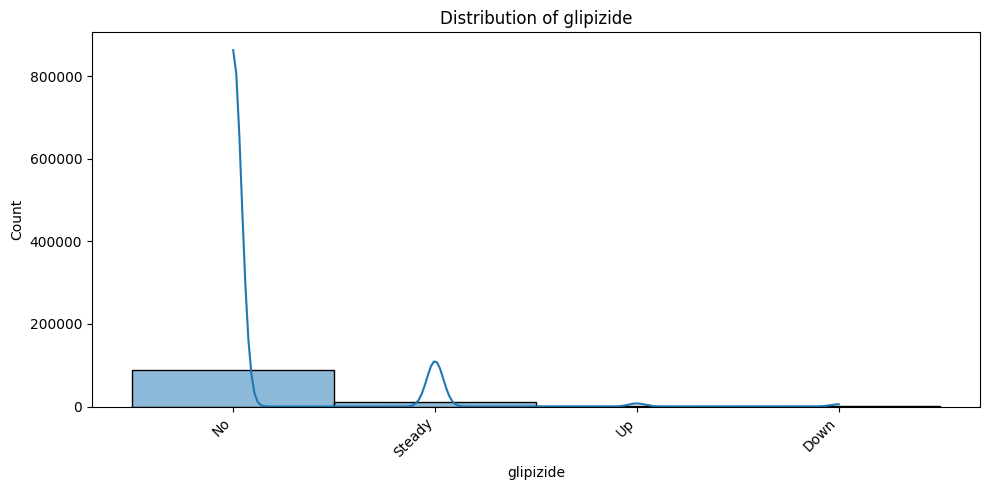

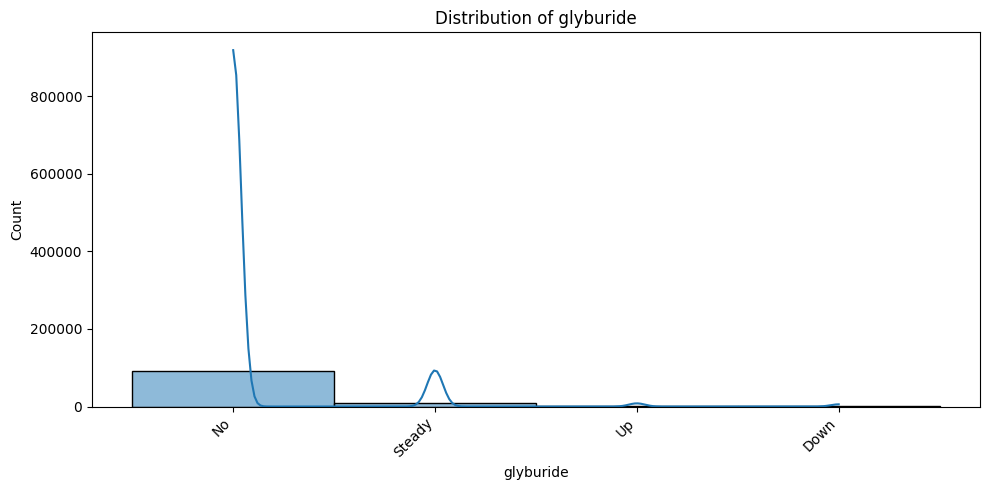

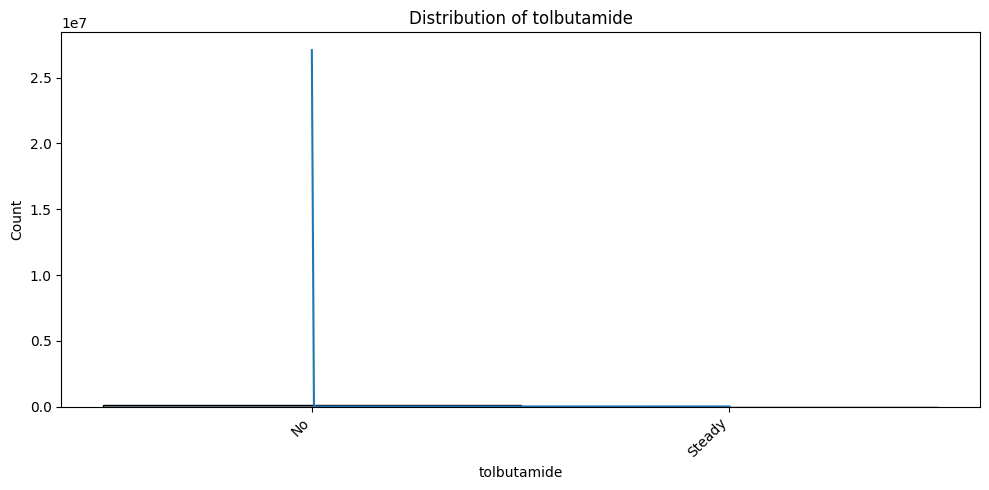

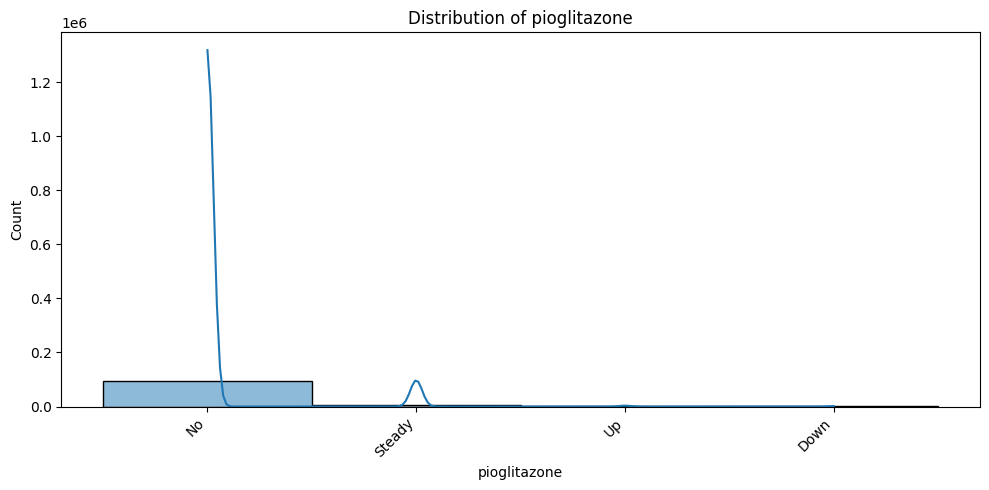

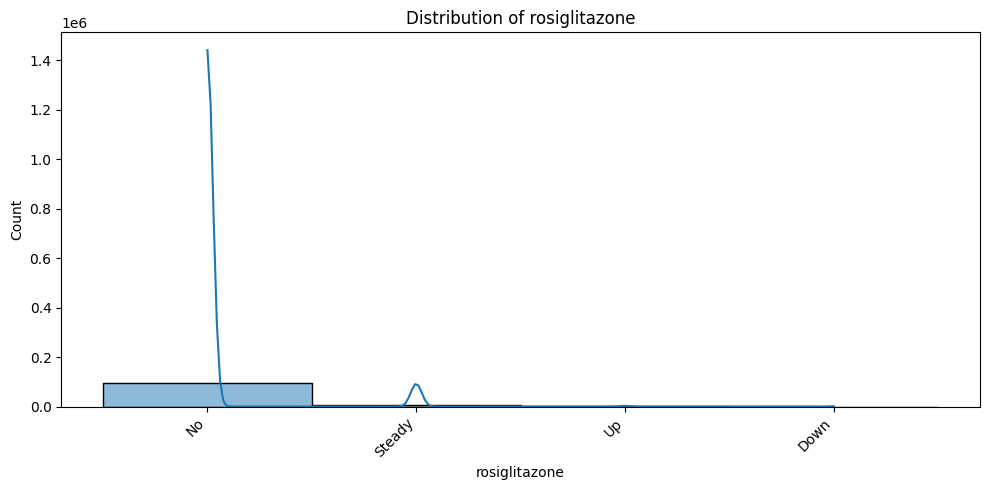

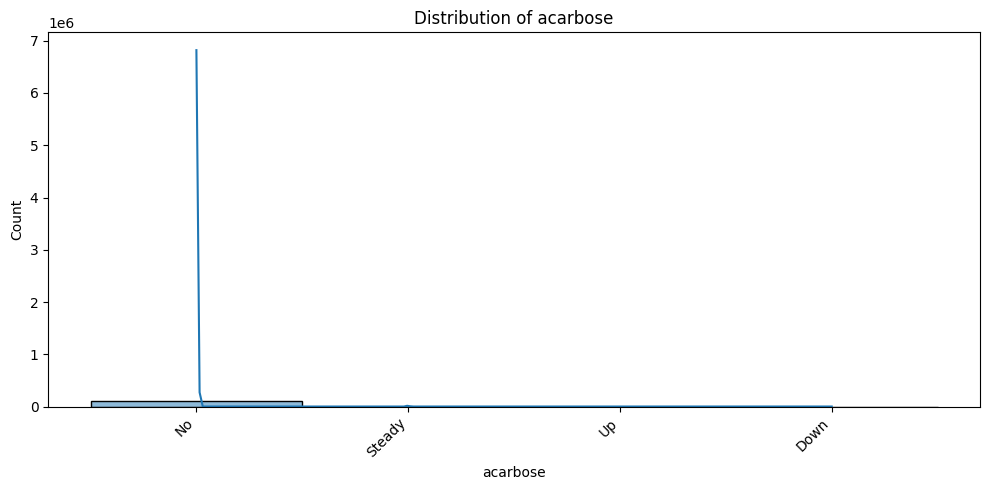

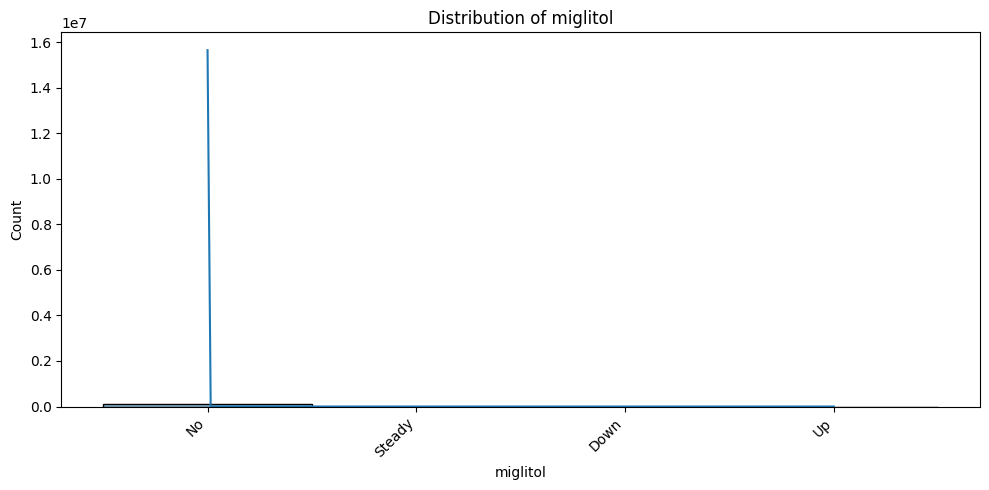

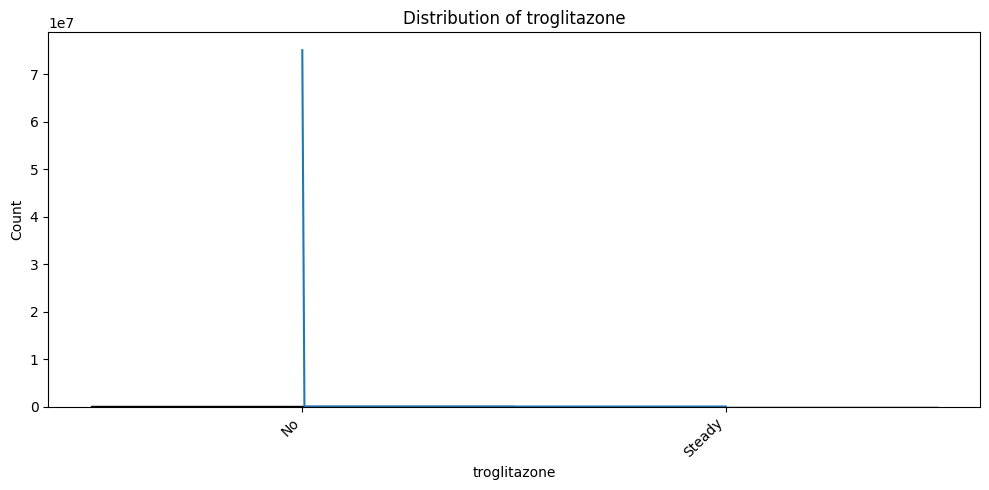

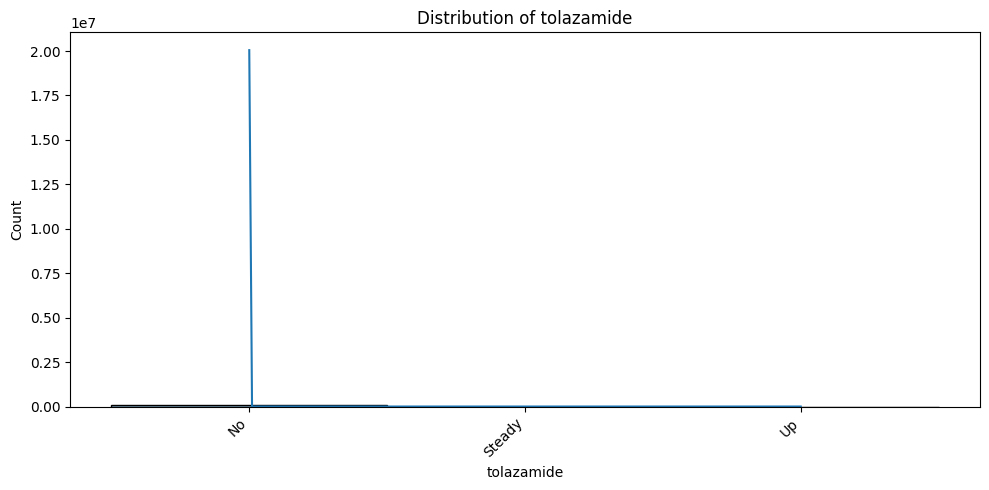

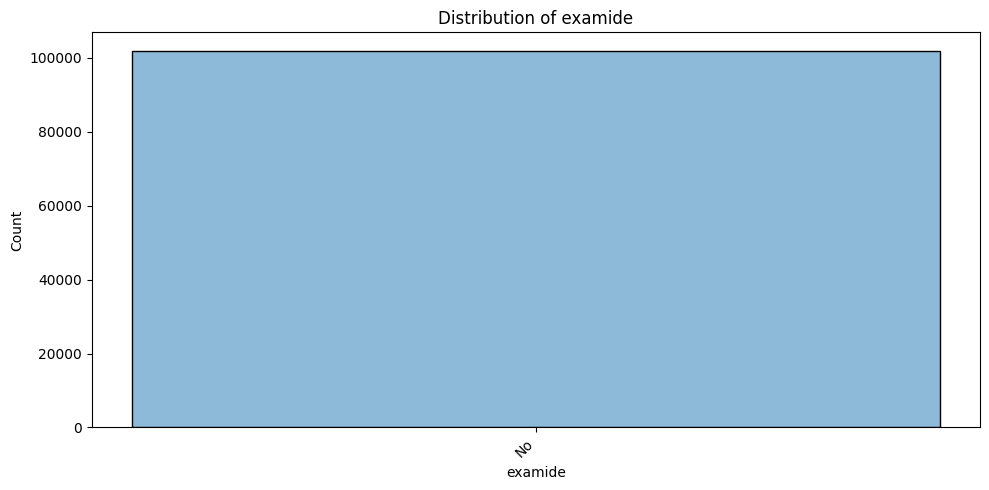

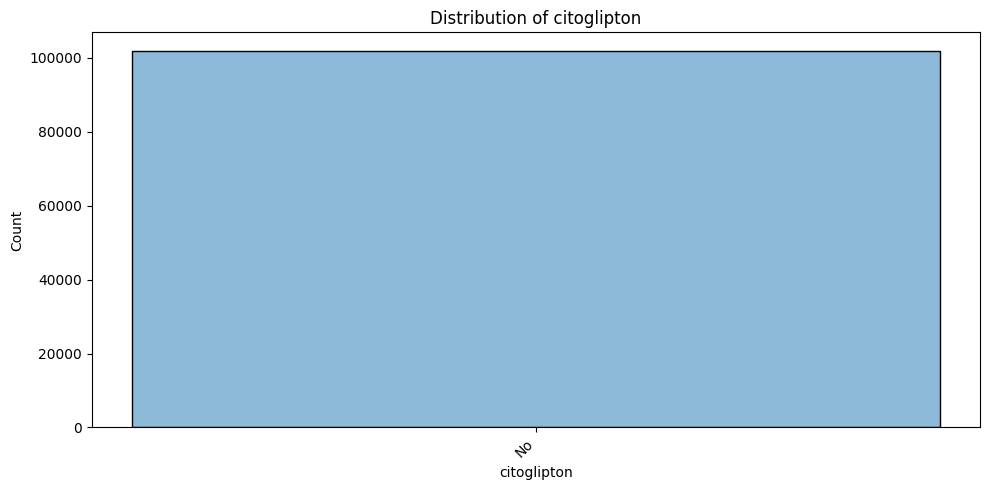

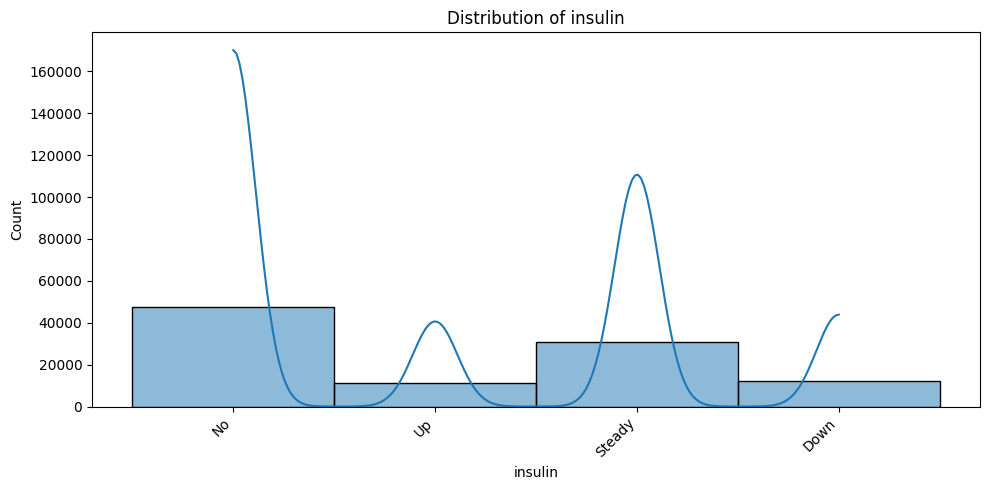

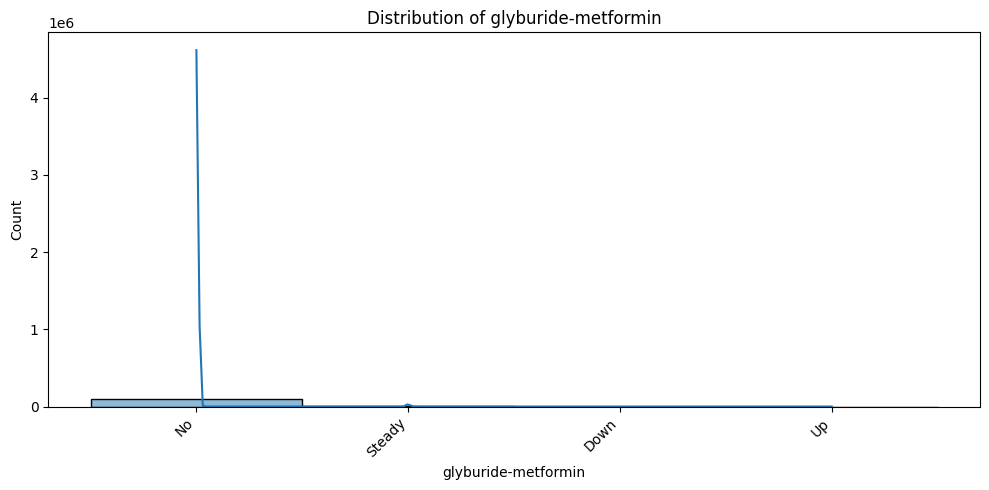

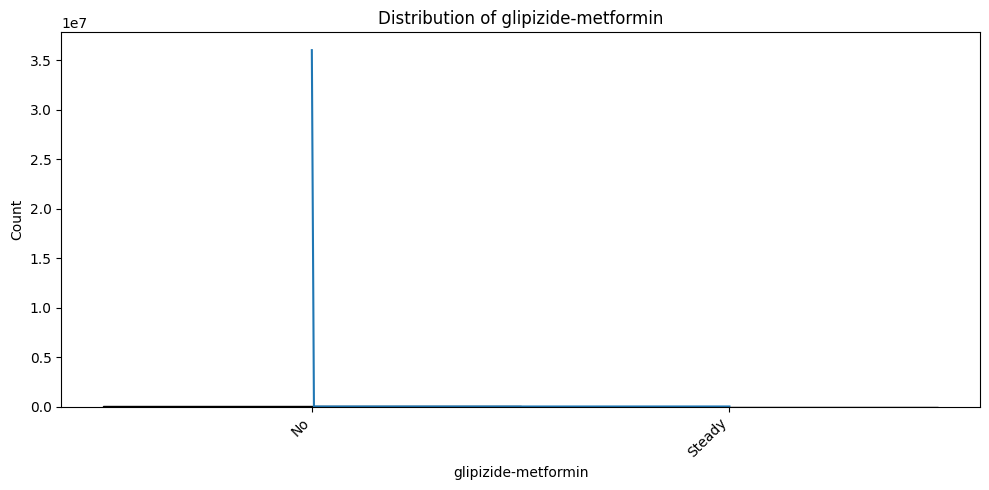

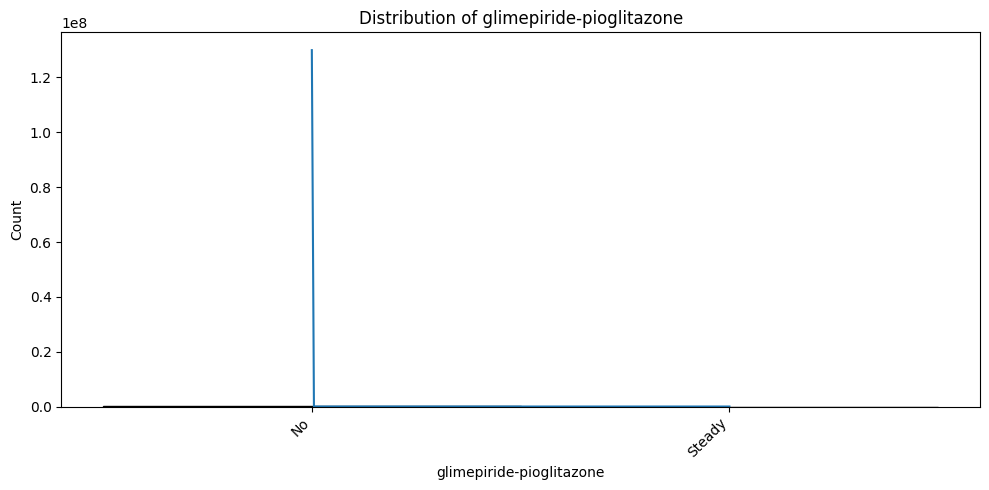

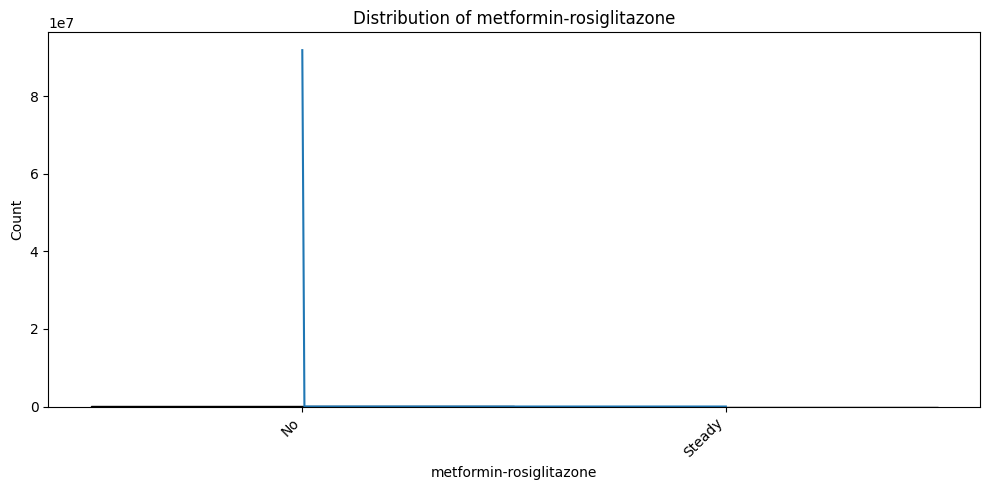

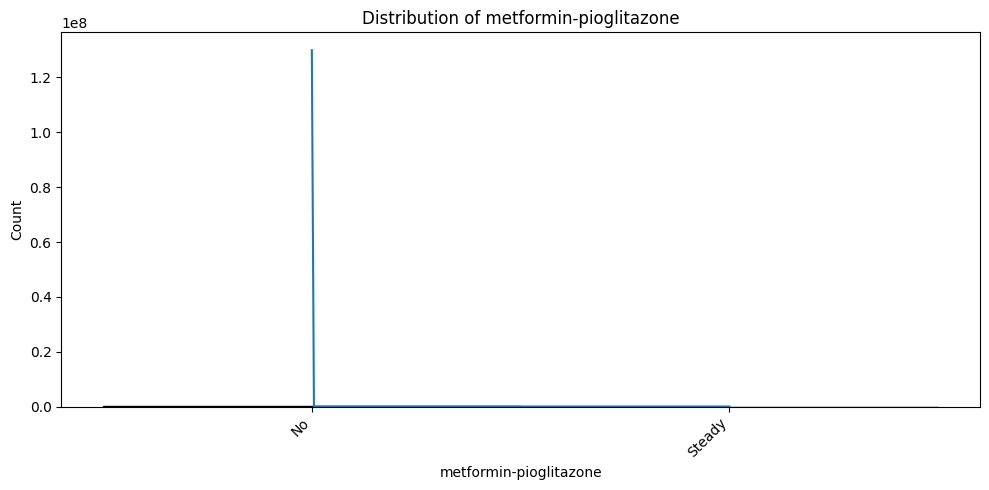

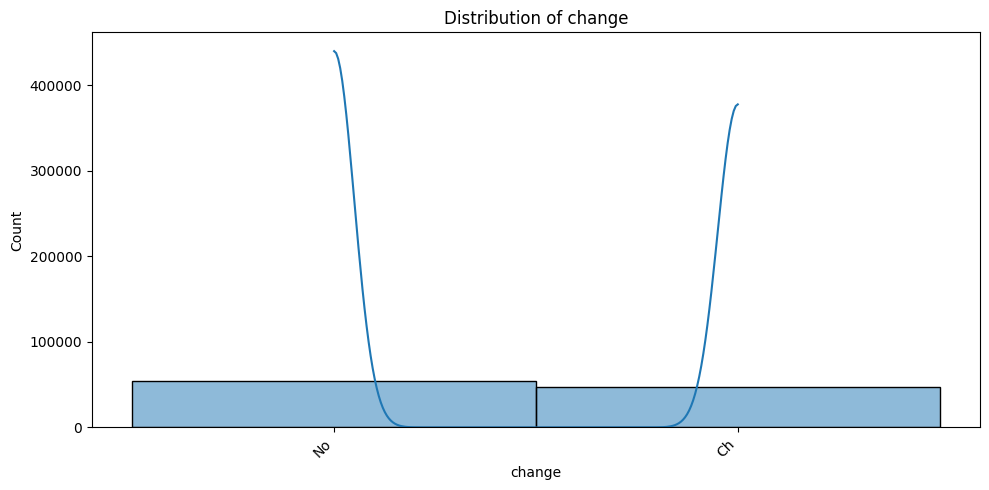

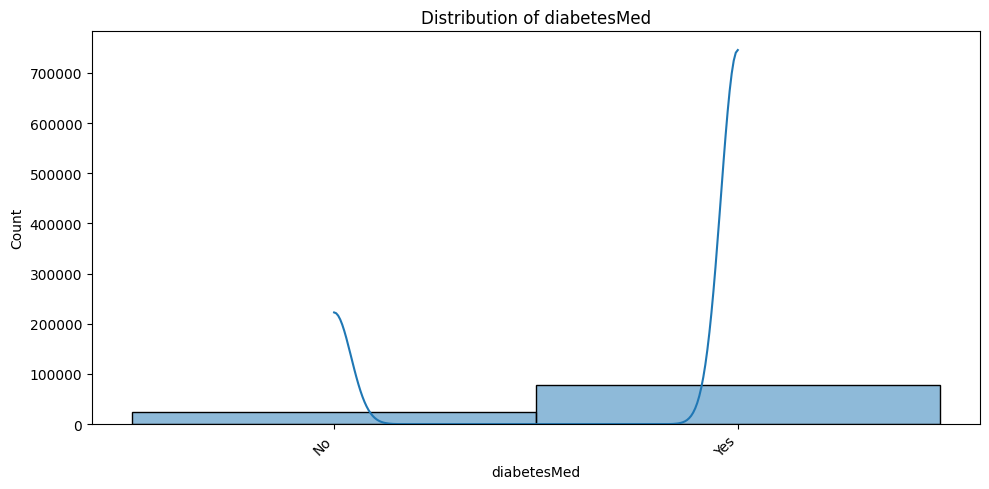

In [ ]:
# Select all columns excluding the numerical ones
diabetic_data_placeholders_substituted_nolabel = diabetic_data_placeholders_substituted.drop(columns='readmitted', inplace=False)
non_numerical_cols = diabetic_data_placeholders_substituted_nolabel.drop(columns=numerical_cols).columns

# Plot distributions for non-numerical columns separately
for col in non_numerical_cols:
    distinct_count = diabetic_data_placeholders_substituted_nolabel[col].nunique()
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))
    
    if col == 'diag_3':
        plt.xticks([], [])  # Hide x-axis labels for diag_3 if needed
        
    if distinct_count > 10:  # Threshold for high-cardinality categories
        plt.xticks([], [])  # Hide x-axis labels for high-cardinality categories
        
    plt.xticks(rotation=45, ha="right")
    sns.histplot(diabetic_data_placeholders_substituted_nolabel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### Check correlation

We can plot a matrix showing the correlation of all features with each other.

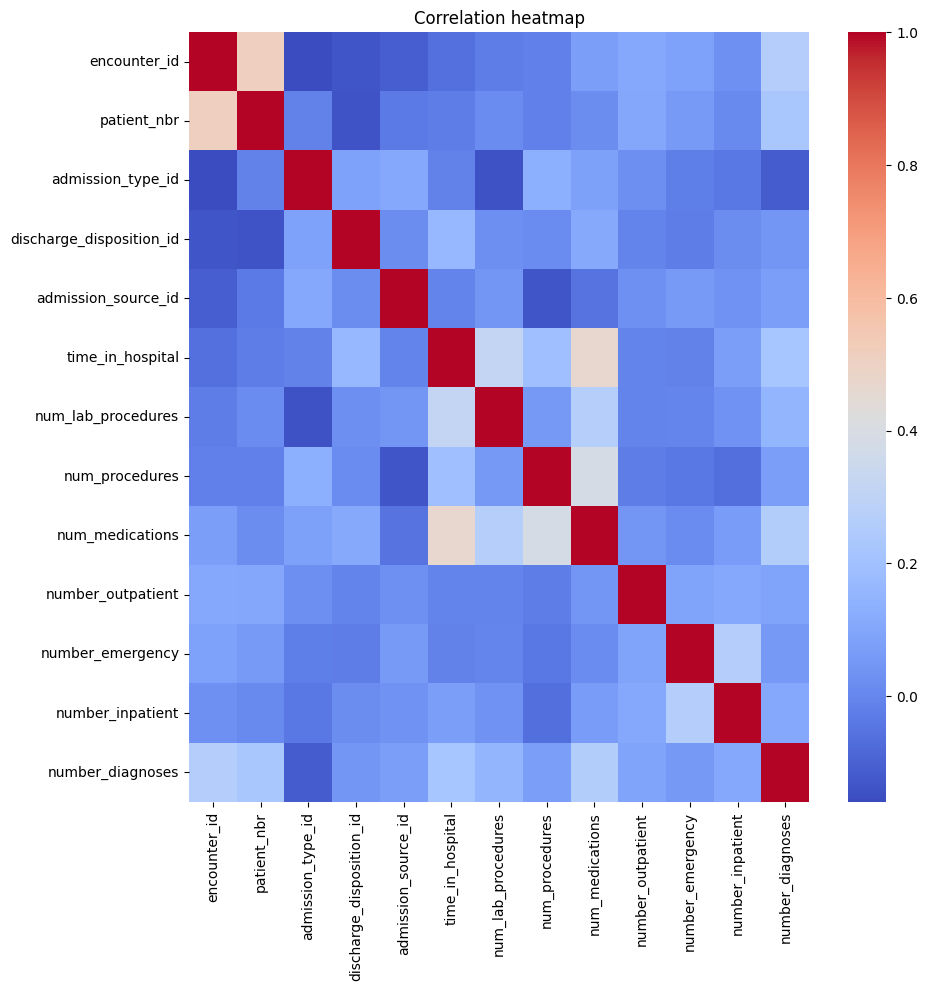

In [32]:
import seaborn as sns

plt.figure(figsize=(10, 10))

# Drop non-numeric columns
df = diabetic_data_placeholders_substituted_nolabel.drop(columns=non_numerical_cols, inplace=False)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation heatmap')

plt.show()

### Outliers dectection afterward handling missing values: - Part 1.2 Dataset Challenges

In [69]:
import pandas as pd
# If needed load the csv ./output_data/replaced_placeholders_with_nan.csv instead of re-run the code
# Load the data replaced_placeholders_with_nan
diabetic_data_placeholders_substituted = pd.read_csv("./output_data/replaced_placeholders_with_nan.csv")

C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1879461651.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted = pd.read_csv("./output_data/replaced_placeholders_with_nan.csv")


In [70]:
# Create a new column simplifying the classification in order to plot labels distribution
diabetic_data_placeholders_substituted['readmitted_yes_no'] = diabetic_data_placeholders_substituted['readmitted'].apply(
    lambda x: 'Readmitted' if x in ['<30', '>30'] else 'Not Readmitted'
)

In [71]:
# Save the new column to a csv file
diabetic_data_placeholders_substituted.to_csv('./output_data/replaced_placeholders_with_nan_two_classes.csv', sep=',', index=False, encoding='utf-8')

In [72]:
# Print the first few rows of the new DataFrame
display(diabetic_data_placeholders_substituted.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_yes_no
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Not Readmitted
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Readmitted
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Not Readmitted
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Not Readmitted
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Not Readmitted


Class Distribution:
readmitted_yes_no
Not Readmitted    54864
Readmitted        46902
Name: count, dtype: int64


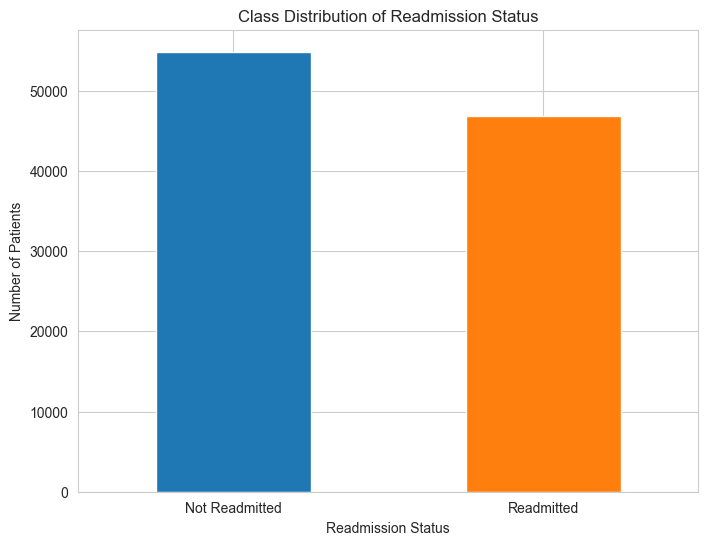

In [73]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = diabetic_data_placeholders_substituted['readmitted_yes_no'].value_counts()

print("Class Distribution:")
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [76]:
def outliers(df):

    num_cols = 2
    num_rows = (len(numerical_cols) // num_cols) + (1 if len(numerical_cols) % num_cols > 0 else 0)


    # Boxplot for numerical columns
    plt.figure(figsize=(25, 20))
    sns.set_style("whitegrid")
    for i, col in enumerate(numerical_cols):
        if col in ['encounter_id', 'patient_nbr']:
            continue
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=col, data=df)
        plt.title(f"Boxplot of {col}")
        plt.ylabel('')
        plt.xticks(rotation=45, fontsize=10)

In [86]:
# plot KDE plot for numerical columns
def kde_plot(df):
    num_cols = 2
    num_rows = (len(numerical_cols) // num_cols) + (1 if len(numerical_cols) % num_cols > 0 else 0)

    # KDE Plot for numerical columns
    plt.figure(figsize=(25, 20))
    for i, col in enumerate(numerical_cols):
        if col in ['admission_source_id', 'admission_type_id', 'discharge_disposition_id']:
            continue
        plt.subplot(num_rows, num_cols, i + 1)
        sns.kdeplot(data=df, x=col, hue='readmitted_yes_no', common_norm=False)
        plt.title(f"KDE Plot of {col} by Readmission Status")

    # Adjust space between subplots
    plt.subplots_adjust(wspace=0.4, hspace=1.4)  # Increase space between plots
    plt.show()


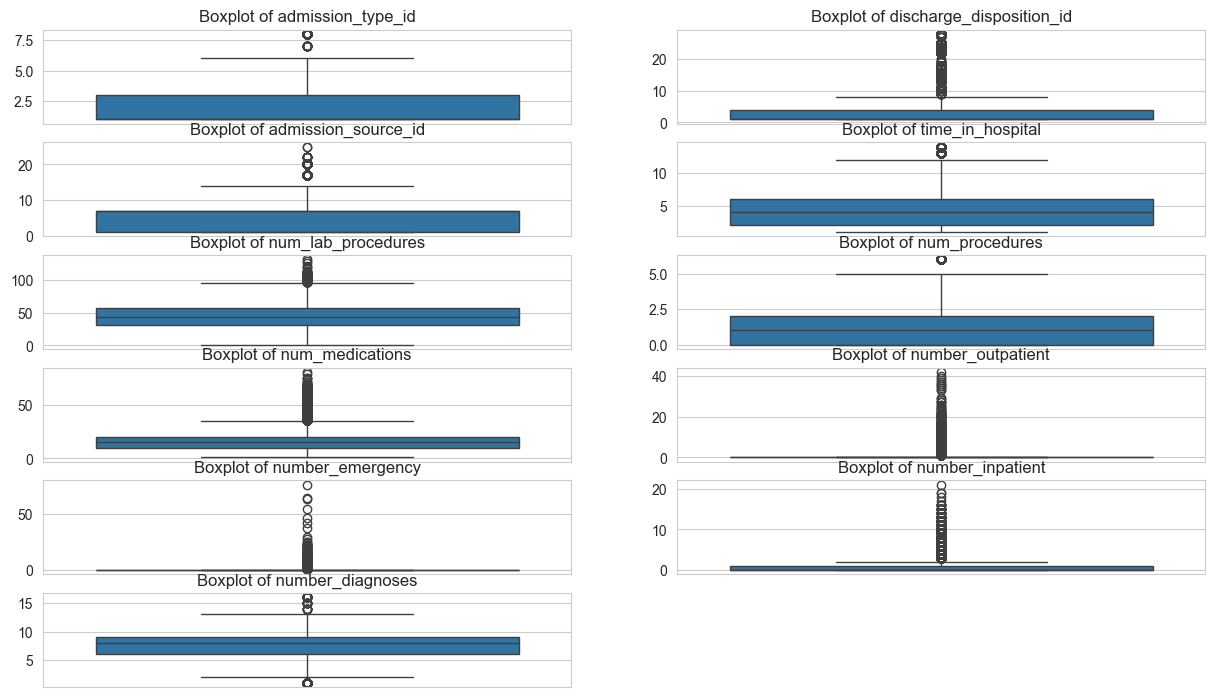

In [62]:
outliers(diabetic_data_placeholders_substituted)

In [64]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


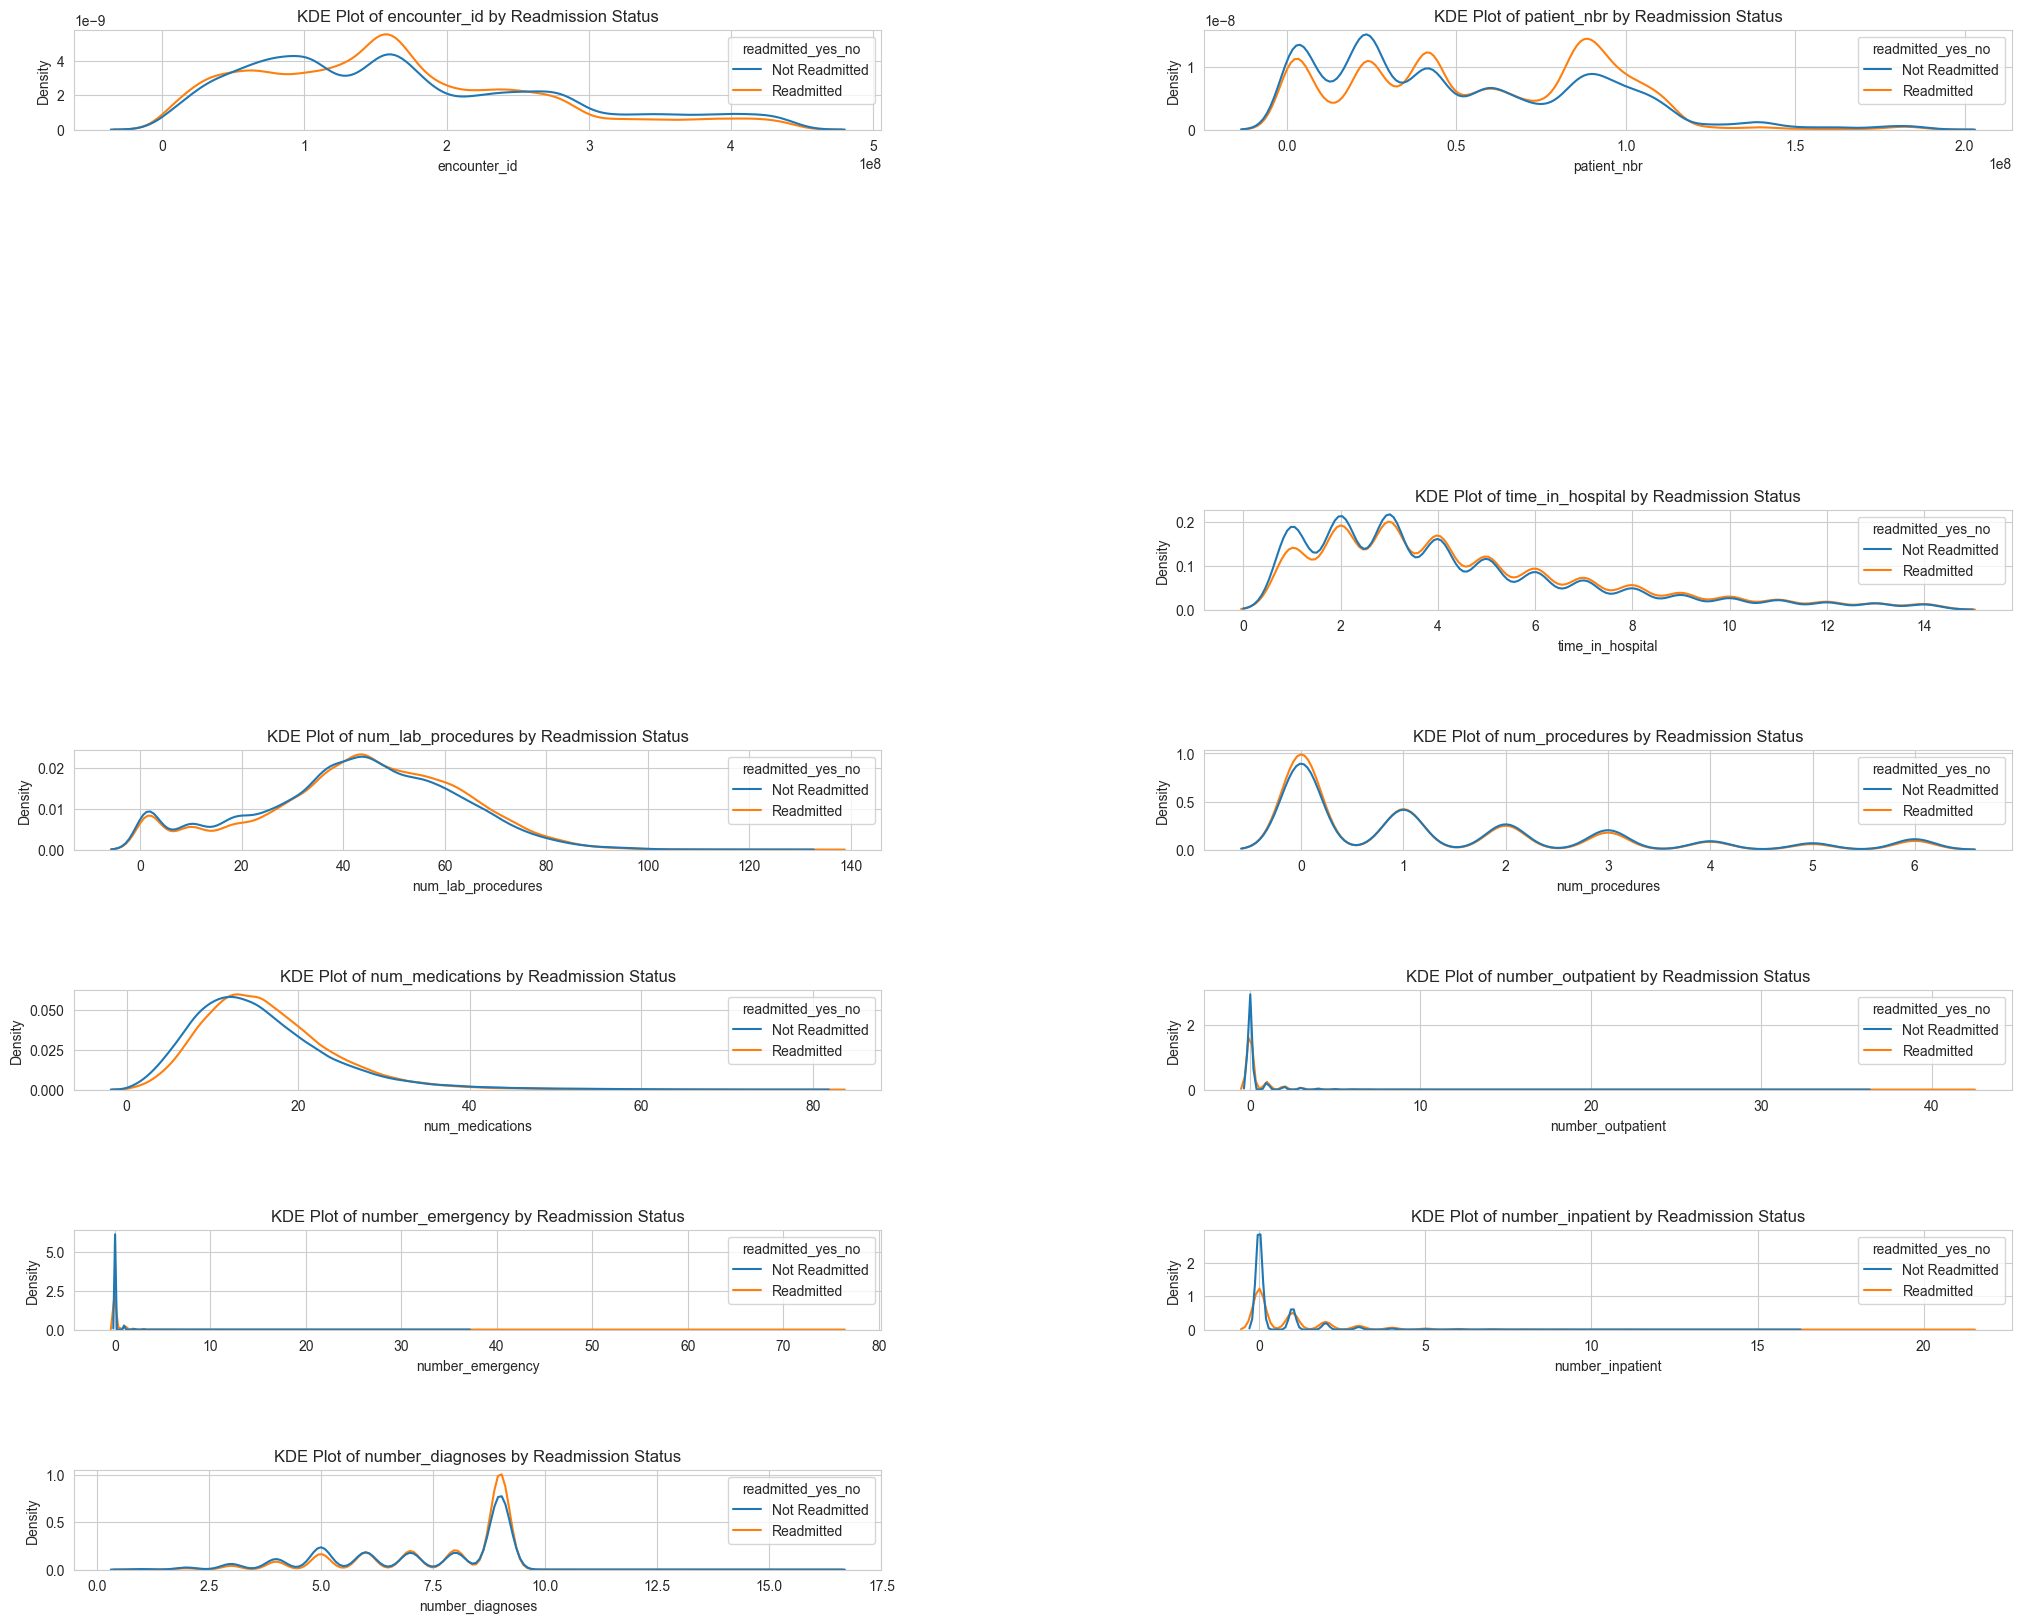

In [87]:
kde_plot(diabetic_data_placeholders_substituted)

In [ ]:
# Scatter plots of features vs target variable
fig, axes = plt.subplots(12, 5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
ax = axes.ravel()

for i, feature in enumerate(numerical_cols):
    ax[i].scatter(diabetic_data_placeholders_substituted[feature], diabetic_data_placeholders_substituted, alpha=0.6, color='blue')    ax[i].set_xlabel(feature, fontsize=10)
    ax[i].set_ylabel("Readmission", fontsize=10)
    ax[i].grid(alpha=0.3)

plt.suptitle('Predictors vs target variable', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

While ignoring NaN values in Z-score computation might be appropriate in certain cases (e.g., when missing values are rare and unlikely to significantly affect the results), it's generally better to address missing values beforehand to avoid potential bias or inaccuracies in outlier detection. Imputation or removal of missing data are common strategies that help ensure the Z-scores more accurately reflect the underlying distribution.

In [ ]:
def outliers_dataframe(df, df_name="DataFrame"):
    # d. Outliers Detection (using Z-Score method)
    print(f"\n{df_name} - Outliers Detection (Z-score > 3):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        # Calculate Z-scores for numeric columns
        z_scores = np.abs(zscore(df[numeric_cols], nan_policy='omit'))  # Ignore NaNs in Z-score calculation
        outliers = (z_scores > 3).sum(axis=0)  # Count the number of outliers per numeric column
        for col, outlier_count in zip(numeric_cols, outliers):
            print(f"{col}: {outlier_count} outliers")
        
        # 6. Plotting Boxplots for Outliers Detection
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(2, 3, i)  # 2 rows, 3 columns for plotting
            df[col].plot(kind='box', title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No numeric columns available for outlier detection in {df_name}.") 

In [ ]:
# correlation with lookup tables

In [ ]:
# feature engineering
def feature_engineering(df): #todo
    # It could have more impact than the choice of the model itself by. Janaina prof
    # Check some paper for feature extraction / feature selection / feature engineering

In [ ]:
readmitted is the label column

Todo: try to follow week4

In [ ]:
Pipeline Order Summary
1️⃣ Preprocessing (Merge lookup tables, clean data, feature engineering)
2️⃣ 🔹 Feature Visualization (Histograms, boxplots, correlations)
3️⃣ Train-Test Split (Avoids data leakage)
4️⃣ Model Training & Evaluation
5️⃣ 🔹 Feature Importance Visualization (Post-training insights)

TODO: Does it make sense to join the three csv with the diabetic_data.csv ?
* I could try to compute EDA and see if join them it's needed during this phase
* I could try to train the model and see later if it's needed to join them